In [ ]:
!pip install numpy-financial

#Funciones y datos

In [ ]:
import numpy_financial as npf
import math
import pandas as pd  # Para mostrar la tabla
import matplotlib.pyplot as plt  # Para las gráficas


precio_p_min = 600
precio_p_max = 1200
step_p = 100

precio_b = 0  # precio_b es constante
tasa_descuento = 0.05 #5% de C.O
tasa_descuento2 = 0.08 # 8% de C.O

#tir = npf.irr(flujos)  # Calcular la TIR

def calcular_vpn(flujo_inicial, flujos, tasa_descuento):
    vpn_flujos_futuros = 0

    # Calcular el VPN de los flujos futuros
    for t in range(1, len(flujos)):
        valor_presente = flujos[t] / (1 + tasa_descuento) ** t
        vpn_flujos_futuros += valor_presente

    # Sumamos el flujo inicial
    vpn_total = flujo_inicial + vpn_flujos_futuros

    return vpn_total

def calcular_nper(PV, PMT, rate, FV=0):
    if rate == 0:
        return PV / PMT  # Caso especial sin tasa de interés

    try:
        denominador = PMT + rate * PV
        if denominador <= 0:
            return None  # Evita divisiones inválidas
        NPER = math.log((PMT - rate * FV) / denominador) / math.log(1 + rate)

        return NPER
    except (ValueError, ZeroDivisionError):
        return None  # Manejo de errores matemáticos

calculo_seg = 28819.4751955+36339.4236325001

#Ind1 0.4


Resultados guardados en 'resultados_vpn_tir_payback.xlsx'

Resultados para la industria 1:
 Precio_P  Precio_B  TIR (%)  VPN (5%)  Payback (5%)  VPN (8%)  Payback (8%)
      600         0 19.51614 235338.36        5.9847 146222.66        6.7498
      700         0 16.55707 213338.36        7.1771 124222.66        8.3155
      800         0 14.28283 191338.36        8.4431 102222.66       10.0960
      900         0 12.46534 169338.36        9.7925  80222.66       12.1600
     1000         0 10.96890 147338.36       11.2371  58222.66       14.6148
     1100         0  9.70765 125338.36       12.7912  36222.66       17.6440
     1200         0  8.62450 103338.36       14.4730  14222.66       21.6012


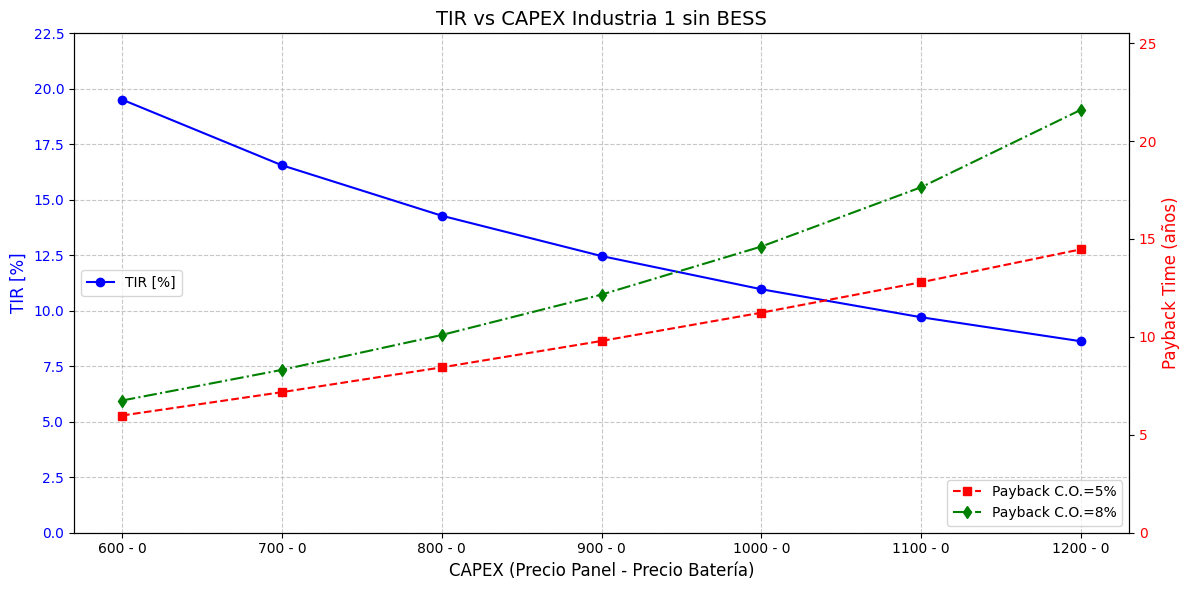

In [ ]:
# Parámetros iniciales y configuración de variaciones


segunda_variable = calculo_seg*0.4


# Lista para almacenar resultados
resultados = []

# Iterar sobre el rango de precios de precio_p
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    primer_variable = primer_variable = -(220 * precio_p) # Establecer primer_variable como 0

    # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
    flujos = [primer_variable] + [segunda_variable] * 25

    # Calcular la TIR
    tir = npf.irr(flujos)
    tir_porcentaje = round(tir * 100, 5)

    # Calcular VPN para 12% y 8%
    flujo_inicial = flujos[0]
    vpn_total = calcular_vpn(flujo_inicial, flujos, tasa_descuento)
    vpn_total2 = calcular_vpn(flujo_inicial, flujos, tasa_descuento2)

    # Calcular Payback Time
    payback = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento)
    payback2 = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento2)

    # Guardar resultados en la lista
    resultados.append({
        "Precio_P": precio_p,
        "Precio_B": precio_b,
        "TIR (%)": tir_porcentaje,
        "VPN (5%)": round(vpn_total, 2),
        "Payback (5%)": round(payback, 4),
        "VPN (8%)": round(vpn_total2, 2),
        "Payback (8%)": round(payback2, 4)
    })

# Mostrar los resultados en formato de tabla con Pandas
df_resultados = pd.DataFrame(resultados)

# Guardar los resultados en un archivo CSV
output_file = "resultados_Ind1_sinBESS04.csv"
df_resultados.to_csv(output_file, index=False)

# Guardar los resultados en un archivo Excel
df_resultados.to_excel("resultados_Ind1_sinBESS04.xlsx", index=False)
print("\nResultados guardados en 'resultados_Ind1_sinBESS04.xlsx'")

print("\nResultados para la industria 1:")
print(df_resultados.to_string(index=False))

# Crear una columna auxiliar con tuplas para ordenar correctamente
df_resultados["Orden"] = df_resultados.apply(lambda row: (row["Precio_P"], row["Precio_B"]), axis=1)

# Ordenar el DataFrame por esta nueva columna
df_resultados = df_resultados.sort_values(by="Orden")

# Eliminar la columna auxiliar después de ordenar
df_resultados = df_resultados.drop(columns=["Orden"])

# Crear o actualizar la columna para el eje X con formato "precio_p - precio_b"
df_resultados["CAPEX (Precio_P-B)"] = df_resultados["Precio_P"].astype(str) + " - " + df_resultados["Precio_B"].astype(str)

# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar TIR en el eje Y izquierdo
ax1.plot(
    df_resultados["CAPEX (Precio_P-B)"],
    df_resultados["TIR (%)"],
    marker='o', linestyle='-', color='b', label='TIR [%]'
)
ax1.set_xlabel("CAPEX (Precio Panel - Precio Batería)", fontsize=12)
ax1.set_ylabel("TIR [%]", color='b', fontsize=12)
ax1.set_ylim(0, 22.5)
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle='--', alpha=0.7)

# Crear un segundo eje Y para el Payback Time
ax2 = ax1.twinx()
ax2.plot(
    df_resultados["CAPEX (Precio_P-B)"],
    df_resultados["Payback (5%)"],
    marker='s', linestyle='--', color='r', label='Payback C.O.=5%'
)
ax2.plot(
    df_resultados["CAPEX (Precio_P-B)"],
    df_resultados["Payback (8%)"],
    marker='d', linestyle='-.', color='g', label='Payback C.O.=8%'
)
ax2.set_ylabel("Payback Time (años)", color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 25.5)

# Configurar el título y las etiquetas del eje X
plt.xticks(rotation=45, fontsize=10)
plt.title("TIR vs CAPEX Industria 1 sin BESS", fontsize=14)

# Agregar leyendas
ax1.legend(loc='center left')
ax2.legend(loc='lower right')

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar la gráfica
plt.show()

#Ind2 0.6


Resultados guardados en 'resultados_vpn_tir_payback.xlsx'

Resultados para la industria 1:
 Precio_P  Precio_B  TIR (%)  VPN (5%)  Payback (5%)  VPN (8%)  Payback (8%)
      600         0 11.61563 236007.54       10.5678  102334.0       13.4412
      700         0  9.55049 183507.54       13.0126   49834.0       18.1177
      800         0  7.92560 131007.54       15.7890   -2666.0       25.4948
      900         0  6.60000  78507.54       19.0013  -55166.0       44.2721
     1000         0  5.48872  26007.54       22.8124 -107666.0           NaN
     1100         0  4.53721 -26492.46       27.4978 -160166.0           NaN
     1200         0  3.70867 -78992.46       33.5819 -212666.0           NaN


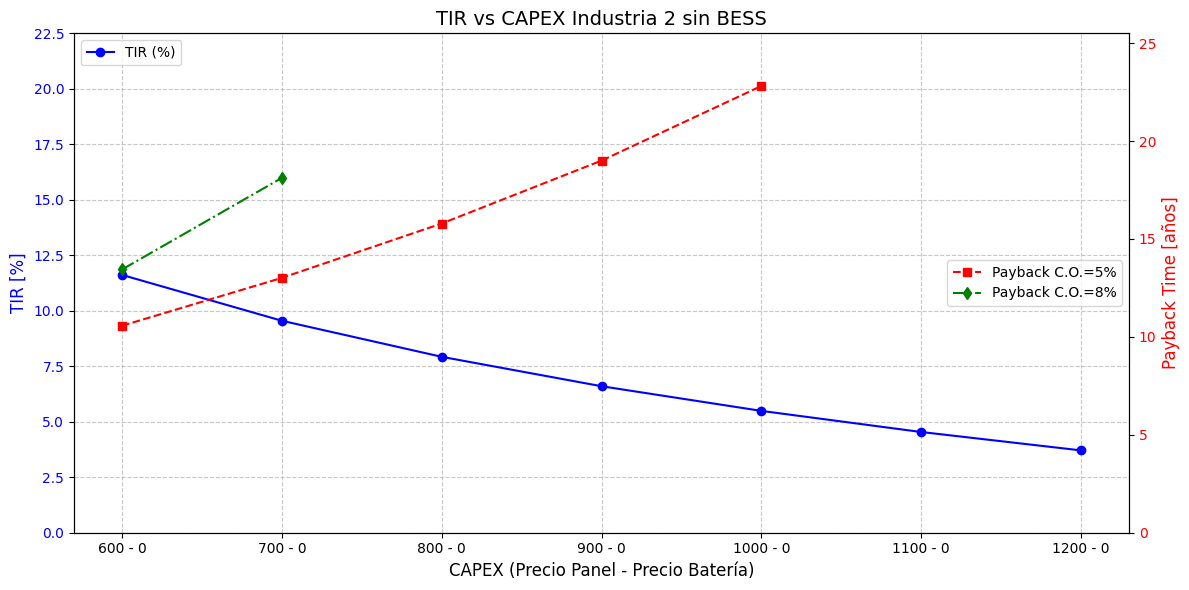

In [ ]:

segunda_variable_2 = calculo_seg*0.6

# Lista para almacenar resultados
resultados = []

# Iterar sobre el rango de precios de precio_p
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    primer_variable = primer_variable = -(525 * precio_p) # Establecer primer_variable como 0

    # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
    flujos = [primer_variable] + [segunda_variable_2] * 25

    # Calcular la TIR
    tir = npf.irr(flujos)
    tir_porcentaje = round(tir * 100, 5)

    # Calcular VPN para 12% y 8%
    flujo_inicial = flujos[0]
    vpn_total = calcular_vpn(flujo_inicial, flujos, tasa_descuento)
    vpn_total2 = calcular_vpn(flujo_inicial, flujos, tasa_descuento2)

    # Calcular Payback Time
    payback_2 = calcular_nper(flujo_inicial, segunda_variable_2, tasa_descuento)
    payback2_2 = calcular_nper(flujo_inicial, segunda_variable_2, tasa_descuento2)

    # Guardar resultados en la lista
    resultados.append({
        "Precio_P": precio_p,
        "Precio_B": precio_b,
        "TIR (%)": tir_porcentaje,
        "VPN (5%)": round(vpn_total, 2),
        "Payback (5%)": round(payback_2, 4) if payback_2 is not None else None,
        "VPN (8%)": round(vpn_total2, 2),
        "Payback (8%)": round(payback2_2, 4) if payback2_2 is not None else None
    })

df_resultados = pd.DataFrame(resultados)
# Guardar los resultados en un archivo CSV
output_file = "resultados_Ind2_sinBESS06.csv"
df_resultados.to_csv(output_file, index=False)

# Guardar los resultados en un archivo Excel
df_resultados.to_excel("resultados_Ind2_sinBESS06.xlsx", index=False)
print("\nResultados guardados en 'resultados_Ind2_sinBESS06.xlsx'")

print("\nResultados para la industria 1:")
print(df_resultados.to_string(index=False))

# Crear una columna auxiliar con tuplas para ordenar correctamente
df_resultados["Orden"] = df_resultados.apply(lambda row: (row["Precio_P"], row["Precio_B"]), axis=1)

# Ordenar el DataFrame por esta nueva columna
df_resultados = df_resultados.sort_values(by="Orden")

# Eliminar la columna auxiliar después de ordenar
df_resultados = df_resultados.drop(columns=["Orden"])

# Crear o actualizar la columna para el eje X con formato "precio_p - precio_b"
df_resultados["CAPEX (Precio_P-B)"] = df_resultados["Precio_P"].astype(str) + " - " + df_resultados["Precio_B"].astype(str)

# Filtrar los datos para la gráfica: incluir solo "Payback (5%) <= 25" y "Payback (8%) <= 25"
df_resultados_grafica = df_resultados.copy()
df_resultados_grafica["Payback (5%)"] = df_resultados_grafica["Payback (5%)"].apply(
    lambda x: x if x is not None and x <= 25 else None
)
df_resultados_grafica["Payback (8%)"] = df_resultados_grafica["Payback (8%)"].apply(
    lambda x: x if x is not None and x <= 25 else None
)

# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar TIR en el eje Y izquierdo
ax1.plot(
    df_resultados["CAPEX (Precio_P-B)"],
    df_resultados["TIR (%)"],
    marker='o', linestyle='-', color='b', label='TIR (%)'
)
ax1.set_xlabel("CAPEX (Precio Panel - Precio Batería)", fontsize=12)
ax1.set_ylabel("TIR [%]", color='b', fontsize=12)
ax1.set_ylim(0, 22.5)
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle='--', alpha=0.7)

# Crear un segundo eje Y para el Payback Time
ax2 = ax1.twinx()
ax2.plot(
    df_resultados_grafica["CAPEX (Precio_P-B)"],
    df_resultados_grafica["Payback (5%)"],
    marker='s', linestyle='--', color='r', label='Payback C.O.=5%'
)
ax2.plot(
    df_resultados_grafica["CAPEX (Precio_P-B)"],
    df_resultados_grafica["Payback (8%)"],
    marker='d', linestyle='-.', color='g', label='Payback C.O.=8%'
)
ax2.set_ylabel("Payback Time [años]", color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 25.5)

# Configurar el título y las etiquetas del eje X
plt.xticks(rotation=45, fontsize=10)
plt.title("TIR vs CAPEX Industria 2 sin BESS", fontsize=14)

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='center right')

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar la gráfica
plt.show()


#Ind 1 0.2



Resultados guardados en 'resultados_vpn_tir_payback.xlsx'

Resultados para la industria 1:
 Precio_P  Precio_B  TIR (%)  VPN (5%)  Payback (5%)   VPN (8%)  Payback (8%)
      600         0  8.62450  51669.18       14.4730    7111.33       21.6012
      700         0  6.84580  29669.18       18.3173  -14888.67       37.7773
      800         0  5.43046   7669.18       23.0532  -36888.67           NaN
      900         0  4.26495 -14330.82       29.2229  -58888.67           NaN
     1000         0  3.28017 -36330.82       38.0913  -80888.67           NaN
     1100         0  2.43130 -58330.82       54.0693 -102888.67           NaN
     1200         0  1.68786 -80330.82           NaN -124888.67           NaN


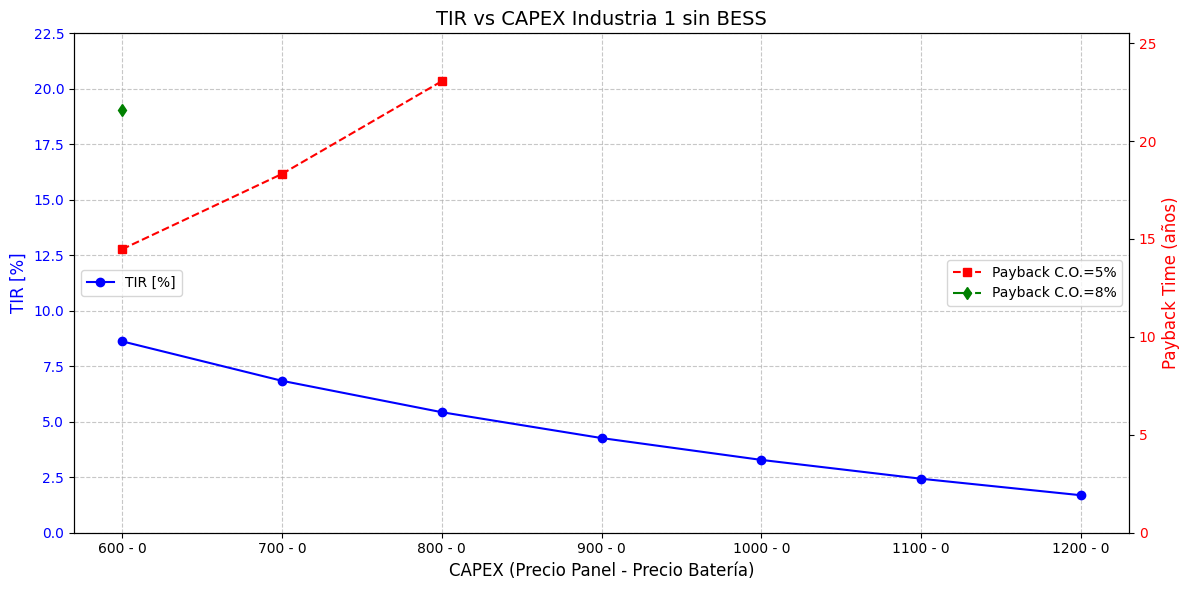

In [ ]:
# Parámetros iniciales y configuración de variaciones


segunda_variable = calculo_seg*0.2


# Lista para almacenar resultados
resultados = []

# Iterar sobre el rango de precios de precio_p
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    primer_variable = primer_variable = -(220 * precio_p) # Establecer primer_variable como 0

    # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
    flujos = [primer_variable] + [segunda_variable] * 25

    # Calcular la TIR
    tir = npf.irr(flujos)
    tir_porcentaje = round(tir * 100, 5)

    # Calcular VPN para 12% y 8%
    flujo_inicial = flujos[0]
    vpn_total = calcular_vpn(flujo_inicial, flujos, tasa_descuento)
    vpn_total2 = calcular_vpn(flujo_inicial, flujos, tasa_descuento2)

    # Calcular Payback Time
    payback = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento)
    payback2 = calcular_nper(flujo_inicial, segunda_variable, tasa_descuento2)

    # Guardar resultados en la lista
    resultados.append({
        "Precio_P": precio_p,
        "Precio_B": precio_b,
        "TIR (%)": tir_porcentaje,
        "VPN (5%)": round(vpn_total, 2),
        "Payback (5%)": round(payback, 4)if payback is not None else None,
        "VPN (8%)": round(vpn_total2, 2),
        "Payback (8%)": round(payback2, 4) if payback2 is not None else None
    })

# Mostrar los resultados en formato de tabla con Pandas
df_resultados = pd.DataFrame(resultados)

# Guardar los resultados en un archivo CSV
output_file = "resultados_Ind1_sinBESS02.csv"
df_resultados.to_csv(output_file, index=False)

# Guardar los resultados en un archivo Excel
df_resultados.to_excel("resultados_Ind1_sinBESS02.xlsx", index=False)
print("\nResultados guardados en 'resultados_Ind1_sinBESS02.xlsx'")

print("\nResultados para la industria 1:")
print(df_resultados.to_string(index=False))

# Crear una columna auxiliar con tuplas para ordenar correctamente
df_resultados["Orden"] = df_resultados.apply(lambda row: (row["Precio_P"], row["Precio_B"]), axis=1)

# Ordenar el DataFrame por esta nueva columna
df_resultados = df_resultados.sort_values(by="Orden")

# Eliminar la columna auxiliar después de ordenar
df_resultados = df_resultados.drop(columns=["Orden"])

# Crear o actualizar la columna para el eje X con formato "precio_p - precio_b"
df_resultados["CAPEX (Precio_P-B)"] = df_resultados["Precio_P"].astype(str) + " - " + df_resultados["Precio_B"].astype(str)

df_resultados_grafica = df_resultados.copy()

# Filtrar valores superiores a 25 en las columnas de Payback Time
df_resultados_grafica["Payback (5%)"] = df_resultados_grafica["Payback (5%)"].apply(
    lambda x: x if x is not None and x <= 25 else None
)
df_resultados_grafica["Payback (8%)"] = df_resultados_grafica["Payback (8%)"].apply(
    lambda x: x if x is not None and x <= 25 else None
)

# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar TIR en el eje Y izquierdo
ax1.plot(
    df_resultados["CAPEX (Precio_P-B)"],
    df_resultados["TIR (%)"],
    marker='o', linestyle='-', color='b', label='TIR [%]'
)
ax1.set_xlabel("CAPEX (Precio Panel - Precio Batería)", fontsize=12)
ax1.set_ylabel("TIR [%]", color='b', fontsize=12)
ax1.set_ylim(0, 22.5)
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle='--', alpha=0.7)

# Crear un segundo eje Y para el Payback Time
ax2 = ax1.twinx()
ax2.plot(
    df_resultados_grafica["CAPEX (Precio_P-B)"],
    df_resultados_grafica["Payback (5%)"],
    marker='s', linestyle='--', color='r', label='Payback C.O.=5%'
)
ax2.plot(
    df_resultados_grafica["CAPEX (Precio_P-B)"],
    df_resultados_grafica["Payback (8%)"],
    marker='d', linestyle='-.', color='g', label='Payback C.O.=8%'
)
ax2.set_ylabel("Payback Time (años)", color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 25.5)

# Configurar el título y las etiquetas del eje X
plt.xticks(rotation=45, fontsize=10)
plt.title("TIR vs CAPEX Industria 1 sin BESS", fontsize=14)

# Agregar leyendas
ax1.legend(loc='center left')
ax2.legend(loc='center right')

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar la gráfica
plt.show()

#Ind 2 0.8


Resultados guardados en 'resultados_vpn_tir_payback.xlsx'

Resultados para la industria 1:
 Precio_P  Precio_B  TIR (%)  VPN (5%)  Payback (5%)  VPN (8%)  Payback (8%)
      600         0 16.15688 419676.73        7.3733 241445.33        8.5829
      700         0 13.59884 367176.73        8.9084 188945.33       10.7863
      800         0 11.61563 314676.73       10.5678 136445.33       13.4412
      900         0 10.01816 262176.73       12.3735  83945.33       16.7816
     1000         0  8.69358 209676.73       14.3538  31445.33       21.2896
     1100         0  7.57015 157176.73       16.5461 -21054.67       28.2500
     1200         0  6.60000 104676.73       19.0013 -73554.67       44.2721


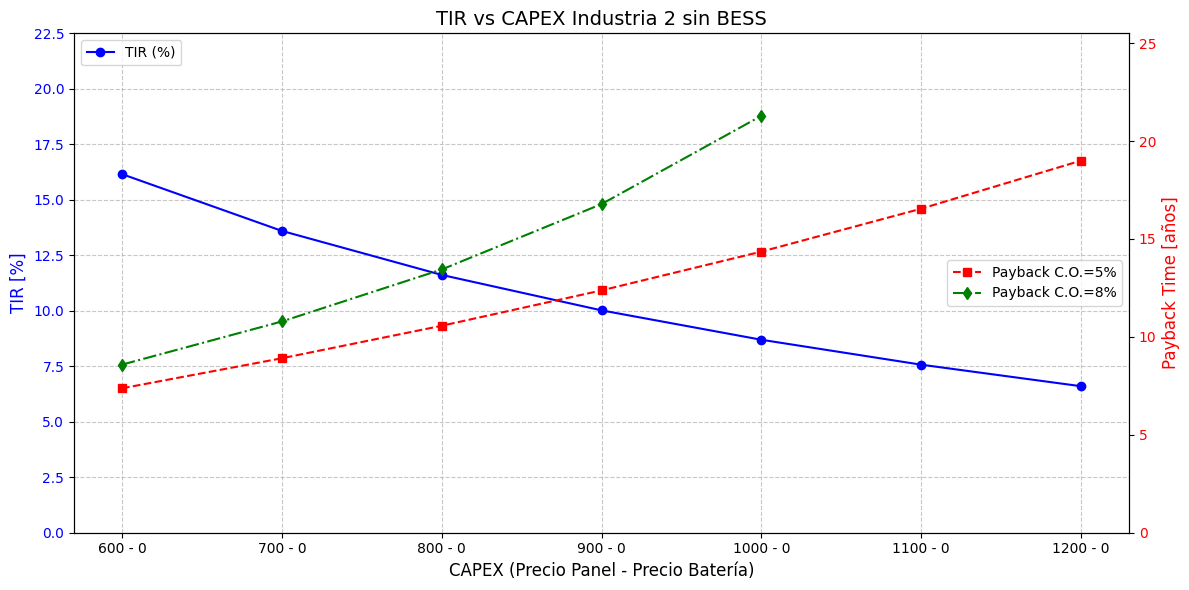

In [ ]:
segunda_variable_2 = calculo_seg*0.8

# Lista para almacenar resultados
resultados = []

# Iterar sobre el rango de precios de precio_p
for precio_p in range(precio_p_min, precio_p_max + 1, step_p):
    primer_variable = primer_variable = -(525 * precio_p) # Establecer primer_variable como 0

    # Crear lista de flujos con el primer valor y los 25 valores de segunda_variable
    flujos = [primer_variable] + [segunda_variable_2] * 25

    # Calcular la TIR
    tir = npf.irr(flujos)
    tir_porcentaje = round(tir * 100, 5)

    # Calcular VPN para 12% y 8%
    flujo_inicial = flujos[0]
    vpn_total = calcular_vpn(flujo_inicial, flujos, tasa_descuento)
    vpn_total2 = calcular_vpn(flujo_inicial, flujos, tasa_descuento2)

    # Calcular Payback Time
    payback_2 = calcular_nper(flujo_inicial, segunda_variable_2, tasa_descuento)
    payback2_2 = calcular_nper(flujo_inicial, segunda_variable_2, tasa_descuento2)

    # Guardar resultados en la lista
    resultados.append({
        "Precio_P": precio_p,
        "Precio_B": precio_b,
        "TIR (%)": tir_porcentaje,
        "VPN (5%)": round(vpn_total, 2),
        "Payback (5%)": round(payback_2, 4) if payback_2 is not None else None,
        "VPN (8%)": round(vpn_total2, 2),
        "Payback (8%)": round(payback2_2, 4) if payback2_2 is not None else None
    })

df_resultados = pd.DataFrame(resultados)
# Guardar los resultados en un archivo CSV
output_file = "resultados_Ind2_sinBESS08.csv"
df_resultados.to_csv(output_file, index=False)

# Guardar los resultados en un archivo Excel
df_resultados.to_excel("resultados_Ind2_sinBESS08.xlsx", index=False)
print("\nResultados guardados en 'resultados_Ind2_sinBESS08.xlsx'")

print("\nResultados para la industria 1:")
print(df_resultados.to_string(index=False))

# Crear una columna auxiliar con tuplas para ordenar correctamente
df_resultados["Orden"] = df_resultados.apply(lambda row: (row["Precio_P"], row["Precio_B"]), axis=1)

# Ordenar el DataFrame por esta nueva columna
df_resultados = df_resultados.sort_values(by="Orden")

# Eliminar la columna auxiliar después de ordenar
df_resultados = df_resultados.drop(columns=["Orden"])

# Crear o actualizar la columna para el eje X con formato "precio_p - precio_b"
df_resultados["CAPEX (Precio_P-B)"] = df_resultados["Precio_P"].astype(str) + " - " + df_resultados["Precio_B"].astype(str)

# Filtrar los datos para la gráfica: incluir solo "Payback (5%) <= 25" y "Payback (8%) <= 25"
df_resultados_grafica = df_resultados.copy()
df_resultados_grafica["Payback (5%)"] = df_resultados_grafica["Payback (5%)"].apply(
    lambda x: x if x is not None and x <= 25 else None
)
df_resultados_grafica["Payback (8%)"] = df_resultados_grafica["Payback (8%)"].apply(
    lambda x: x if x is not None and x <= 25 else None
)

# Crear la figura y el eje principal
fig, ax1 = plt.subplots(figsize=(12, 6))

# Graficar TIR en el eje Y izquierdo
ax1.plot(
    df_resultados["CAPEX (Precio_P-B)"],
    df_resultados["TIR (%)"],
    marker='o', linestyle='-', color='b', label='TIR (%)'
)
ax1.set_xlabel("CAPEX (Precio Panel - Precio Batería)", fontsize=12)
ax1.set_ylabel("TIR [%]", color='b', fontsize=12)
ax1.set_ylim(0, 22.5)
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True, linestyle='--', alpha=0.7)

# Crear un segundo eje Y para el Payback Time
ax2 = ax1.twinx()
ax2.plot(
    df_resultados_grafica["CAPEX (Precio_P-B)"],
    df_resultados_grafica["Payback (5%)"],
    marker='s', linestyle='--', color='r', label='Payback C.O.=5%'
)
ax2.plot(
    df_resultados_grafica["CAPEX (Precio_P-B)"],
    df_resultados_grafica["Payback (8%)"],
    marker='d', linestyle='-.', color='g', label='Payback C.O.=8%'
)
ax2.set_ylabel("Payback Time [años]", color='r', fontsize=12)
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(0, 25.5)

# Configurar el título y las etiquetas del eje X
plt.xticks(rotation=45, fontsize=10)
plt.title("TIR vs CAPEX Industria 2 sin BESS", fontsize=14)

# Agregar leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='center right')

# Ajustar diseño para evitar superposición
plt.tight_layout()

# Mostrar la gráfica
plt.show()
